In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# 读取CSV文件
df = pd.read_csv('../storage/trace.csv')

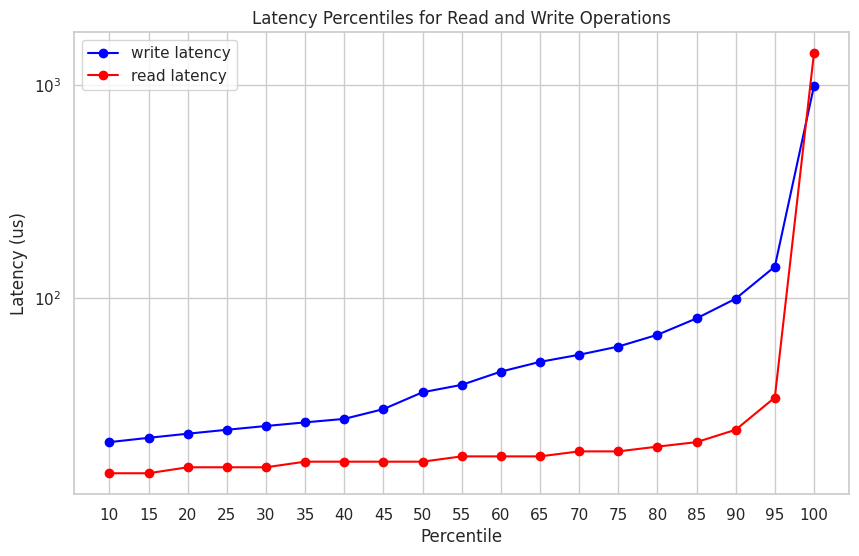

In [65]:
# 数据筛选：分别处理 write 和 read 操作
operations = ['write', 'read']
colors = ['blue', 'red']
percentiles = np.arange(10, 101, 5)  # 定义百分位数，从 10% 到 100%

plt.figure(figsize=(10, 6))

for operation, color in zip(operations, colors):
    operation_df = df[df['operation_type'] == operation]
    # 计算百分位数对应的延迟值
    percentile_durations = np.percentile(operation_df['duration'], percentiles)
    
    # 绘图
    plt.plot(percentiles, percentile_durations, marker='o', label=f'{operation} latency', color=color)

plt.title('Latency Percentiles for Read and Write Operations')
plt.xlabel('Percentile')
plt.ylabel('Latency (us)')
plt.yscale('log')  # 使用对数坐标
plt.grid(True)
plt.legend()
plt.xticks(percentiles)  # 设置 X 轴的刻度为定义的百分位数
plt.show()

In [66]:
# 分别提取write和read的duration数据
write_latency = df[df['operation_type'] == 'write']['duration']
read_latency = df[df['operation_type'] == 'read']['duration']

# 计算write的latency分布
write_percentiles = np.percentile(write_latency, [50, 90, 95, 99, 99.9, 99.99])

# 计算read的latency分布
read_percentiles = np.percentile(read_latency, [50, 90, 95, 99, 99.9, 99.99])


# 打印write和read的latency分布信息
print("Write Latency Distribution:")
print("50%: {:.2f} us".format(write_percentiles[0]))
print("90%: {:.2f} us".format(write_percentiles[1]))
print("95%: {:.2f} us".format(write_percentiles[2]))
print("99%: {:.2f} us".format(write_percentiles[3]))
print("99.9%: {:.2f} us".format(write_percentiles[4]))
print("99.99%: {:.2f} us".format(write_percentiles[5]))

print("\nRead Latency Distribution:")
print("50%: {:.2f} us".format(read_percentiles[0]))
print("90%: {:.2f} us".format(read_percentiles[1]))
print("95%: {:.2f} us".format(read_percentiles[2]))
print("99%: {:.2f} us".format(read_percentiles[3]))
print("99.9%: {:.2f} us".format(read_percentiles[4]))
print("99.99%: {:.2f} us".format(read_percentiles[5]))

Write Latency Distribution:
50%: 36.00 us
90%: 99.00 us
95%: 140.00 us
99%: 308.02 us
99.9%: 652.00 us
99.99%: 916.01 us

Read Latency Distribution:
50%: 17.00 us
90%: 24.00 us
95%: 34.00 us
99%: 153.00 us
99.9%: 492.00 us
99.99%: 795.29 us
